In [1]:
import   pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("Sep_2025_models_with_license_and_basemodel.csv")

In [4]:
print(df.shape)
print("\nColumn names:\n", df.columns.tolist())

(260516, 13)

Column names:
 ['huggingface_link', 'downloads', 'likes', 'library_name', 'pipeline_tag', 'modelId', 'private', 'createdAt', 'arxiv_ids', 'tags_cleaned', 'lics', 'dataset', 'base_model']


## 1 First Look at the Dataset

To begin the exploratory data analysis, we inspected the first rows of the dataset using `df.head()`.

The dataset contains metadata extracted from Hugging Face model cards. The preview of the first five rows is shown below:


In [5]:
df.head(10)

,huggingface_link,downloads,likes,library_name,pipeline_tag,modelId,private,createdAt,arxiv_ids,tags_cleaned,lics,dataset,base_model
0,https://huggingface.co/deepseek-ai/DeepSeek-V3...,5601,393,transformers,text-generation,deepseek-ai/DeepSeek-V3.2-Exp,False,2025-09-29T06:07:26.000Z,['no arxiv id'],"['transformers', 'safetensors', 'deepseek_v32'...",['license:mit'],[],['base_model:deepseek-ai/DeepSeek-V3.2-Exp-Bas...
1,https://huggingface.co/deepseek-ai/DeepSeek-V3...,16197,303,transformers,text-generation,deepseek-ai/DeepSeek-V3.1-Terminus,False,2025-09-22T04:56:04.000Z,['arxiv:2412.19437'],"['transformers', 'safetensors', 'deepseek_v3',...",['license:mit'],[],"['base_model:deepseek-ai/DeepSeek-V3.1-Base', ..."
2,https://huggingface.co/QuantStack/Qwen-Image-E...,120634,152,gguf,image-to-image,QuantStack/Qwen-Image-Edit-2509-GGUF,False,2025-09-22T20:53:25.000Z,['no arxiv id'],"['gguf', 'image-to-image', 'en', 'zh', 'base_m...",['license:apache-2.0'],[],"['base_model:Qwen/Qwen-Image-Edit-2509', 'base..."
3,https://huggingface.co/nunchaku-tech/nunchaku-...,59081,94,diffusers,text-to-image,nunchaku-tech/nunchaku-qwen-image-edit-2509,False,2025-09-24T02:51:15.000Z,['arxiv:2411.05007'],"['diffusers', 'image-editing', 'SVDQuant', 'Qw...",['license:apache-2.0'],['dataset:mit-han-lab/svdquant-datasets'],"['base_model:Qwen/Qwen-Image-Edit-2509', 'base..."
4,https://huggingface.co/openbmb/VoxCPM-0.5B,5708,713,voxcpm,text-to-speech,openbmb/VoxCPM-0.5B,False,2025-09-16T06:56:48.000Z,['no arxiv id'],"['voxcpm', 'pytorch', 'text-to-speech', 'speec...",['license:apache-2.0'],[],"['base_model:openbmb/MiniCPM4-0.5B', 'base_mod..."
5,https://huggingface.co/inclusionAI/Ring-flash-...,88,70,transformers,text-generation,inclusionAI/Ring-flash-linear-2.0,False,2025-09-25T07:05:17.000Z,['no arxiv id'],"['transformers', 'safetensors', 'bailing_moe_l...",['license:mit'],[],"['base_model:inclusionAI/Ling-flash-base-2.0',..."
6,https://huggingface.co/inclusionAI/Ring-mini-l...,119,64,transformers,text-generation,inclusionAI/Ring-mini-linear-2.0,False,2025-09-24T09:08:32.000Z,['no arxiv id'],"['transformers', 'safetensors', 'bailing_moe_l...",['license:mit'],[],['base_model:inclusionAI/Ling-mini-base-2.0-20...
7,https://huggingface.co/mistralai/Magistral-Sma...,18825,220,vllm,NaN,mistralai/Magistral-Small-2509,False,2025-09-12T09:45:10.000Z,['arxiv:2506.10910'],"['vllm', 'safetensors', 'mistral3', 'mistral-c...",['license:apache-2.0'],[],['base_model:mistralai/Mistral-Small-3.2-24B-I...
8,https://huggingface.co/meta-llama/Llama-3.1-8B...,7192139,4690,transformers,text-generation,meta-llama/Llama-3.1-8B-Instruct,False,2024-07-18T08:56:00.000Z,['arxiv:2204.05149'],"['transformers', 'safetensors', 'llama', 'text...",['license:llama3.1'],[],"['base_model:meta-llama/Llama-3.1-8B', 'base_m..."
9,https://huggingface.co/Qwen/Qwen3Guard-Gen-8B,2523,46,transformers,text-generation,Qwen/Qwen3Guard-Gen-8B,False,2025-09-23T11:40:09.000Z,['no arxiv id'],"['transformers', 'safetensors', 'qwen3', 'text...",['license:apache-2.0'],[],"['base_model:Qwen/Qwen3-8B', 'base_model:finet..."


## 2 Dataset Structure and Schema

To understand the overall composition of the dataset, we inspected its shape, column names, and data types.

### **Dataset Shape**

The dataset contains:

- **260,516 rows**
- **13 columns**

This indicates a relatively large collection of model cards, providing sufficient variability for meaningful exploratory analysis.



### **Interpretation**

- Most columns are stored as **object** types due to their textual nature.
- Numerical fields include:
  - **downloads (int64)**
  - **likes (int64)**
- Boolean field:
  - **private**
- Dates (e.g., `createdAt`) are stored as strings and may require conversion to datetime for temporal analysis.
- Nested metadata fields such as **tags**, **lics**, and **arxiv_ids** require special parsing because they contain lists encoded as strings.

In [6]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n")
print(df.dtypes)

df.describe(include='all')

Shape of dataset: (260516, 13)

Column names:
 ['huggingface_link', 'downloads', 'likes', 'library_name', 'pipeline_tag', 'modelId', 'private', 'createdAt', 'arxiv_ids', 'tags_cleaned', 'lics', 'dataset', 'base_model']

Data types:

huggingface_link    object
downloads            int64
likes                int64
library_name        object
pipeline_tag        object
modelId             object
private               bool
createdAt           object
arxiv_ids           object
tags_cleaned        object
lics                object
dataset             object
base_model          object
dtype: object


,huggingface_link,downloads,likes,library_name,pipeline_tag,modelId,private,createdAt,arxiv_ids,tags_cleaned,lics,dataset,base_model
count,260516,2.605160e+05,260516.000000,234469,146837,260516,260516,260516,260516,260516,260516,260516,260516
unique,260516,NaN,NaN,168,52,260516,1,256975,2157,101206,88,11344,38603
top,https://huggingface.co/deepseek-ai/DeepSeek-V3...,NaN,NaN,transformers,text-generation,deepseek-ai/DeepSeek-V3.2-Exp,False,2022-03-02T23:29:05.000Z,['no arxiv id'],"['transformers', 'tensorboard', 'safetensors',...",['license:apache-2.0'],[],['base_model:distilbert/distilbert-base-uncase...
freq,1,NaN,NaN,154204,58062,1,260516,146,246242,2790,157984,203022,9222
mean,NaN,1.135577e+03,1.348055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.505138e+05,27.020382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.200000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3 Missing Values Analysis

To evaluate data completeness, we computed the number of missing values in each column. Understanding where information is absent is essential for assessing data quality and for identifying potential challenges in reproducibility.

The results are shown below:




Final Missing values per column (including list placeholders):

arxiv_ids           246242
dataset             203022
pipeline_tag        113679
library_name         26047
downloads                0
huggingface_link         0
modelId                  0
likes                    0
createdAt                0
private                  0
tags_cleaned             0
lics                     0
base_model               0
has_license              0
dtype: int64


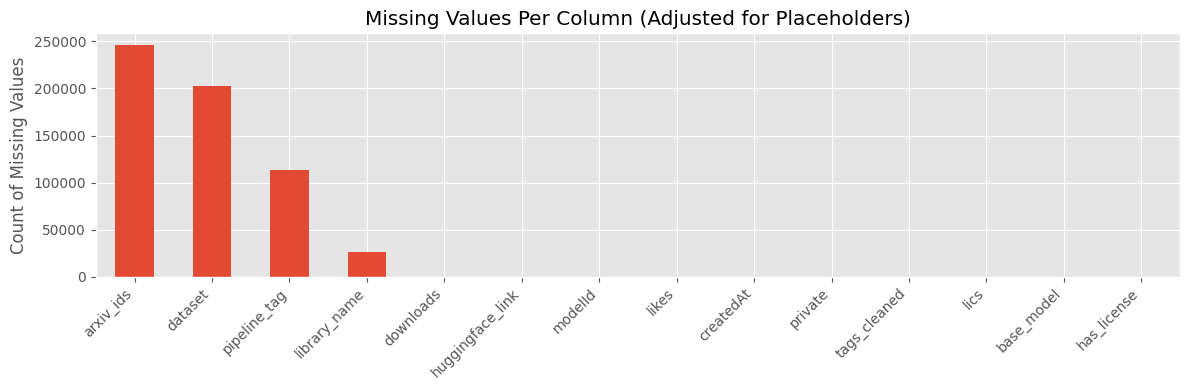

In [28]:
missing = df.isna().sum().sort_values(ascending=False)

df_copy = df.copy()
df_copy['arxiv_ids'] = df_copy['arxiv_ids'].apply(ast.literal_eval)
df_copy['dataset'] = df_copy['dataset'].apply(ast.literal_eval)
missing_arxiv_mask = df_copy['arxiv_ids'].apply(lambda x: x == ['no arxiv id'])
count_missing_arxiv = missing_arxiv_mask.sum()

missing_datasets_mask = df_copy['dataset'].apply(lambda x: x == [])
count_missing_datasets = missing_datasets_mask.sum()


missing.loc['dataset'] = count_missing_datasets

missing.loc['arxiv_ids'] = count_missing_arxiv

missing = missing.sort_values(ascending=False)

print("\nFinal Missing values per column (including list placeholders):\n")
print(missing)

plt.figure(figsize=(12, 4))
missing.plot(kind='bar', title="Missing Values Per Column (Adjusted for Placeholders)")
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **Interpretation**

- The dataset is largely complete, but two fields contain substantial amounts of missing data:
  - **pipeline_tag** (113,679 missing entries),
  - **library_name** (26,047 missing entries),
  - **arXiv_id** (246,242 missing entries).
  - **dataset** (203,022 missing entries)

- All other fields have **no missing values**, which indicates that the core metadata — such as downloads, model identifiers, timestamps, tags, arXiv links, and licenses — is consistently available.

### **Implications for Reproducibility**

- Missing **pipeline_tag** values make it difficult to determine the primary task of several models (e.g., text-generation, fill-mask, embeddings).
  This complicates:
  - model categorization,
  - comparison across model types,
  - reproducing model selection based on task.

- Missing **library_name** values may reduce clarity about which machine learning framework is required to load or run a model.
  Without this information, reproducing experiments becomes harder because:
  - different frameworks require different dependencies,
  - incompatible versions can cause inconsistent results.

- Missing **arxiv_id** may reduce theory insigts behind the model deployed
  Without this information researchers may not have understanding of the model and the reproducibility is almost impossible unless code is provided. 
  
- Missing **datasets** leads to unavailability of reproducing the models, because it will yield different results 

The missing values distribution demonstrates that even large public repositories such as Hugging Face contain incomplete metadata, which poses a practical challenge for reproducible AI research.


## 4 Downloads Distribution

To understand the popularity of models in the dataset, we examined the distribution of the **downloads** variable. This field represents the number of model downloads over the last 30 days on Hugging Face.

The histogram below shows that the distribution is **extremely skewed**, with the vast majority of models having very few downloads.

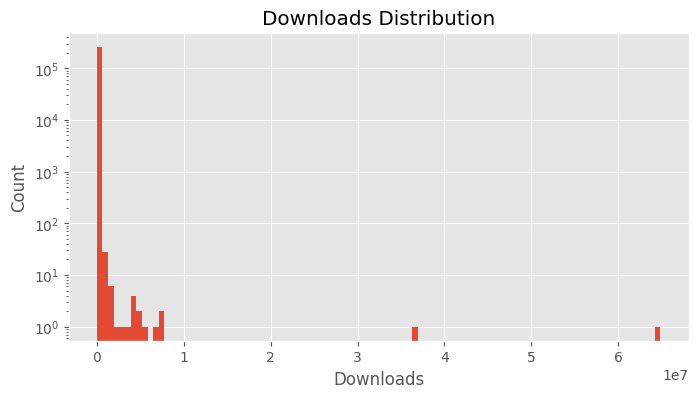

count      260516.00
mean         1135.58
std        150513.84
min             1.00
25%             3.00
50%             3.00
75%            12.00
max      64857161.00
Name: downloads, dtype: object


In [8]:
if 'downloads' in df.columns:
    df['downloads'].hist(bins=100, figsize=(8,4))
    plt.title("Downloads Distribution")
    plt.xlabel("Downloads")
    plt.yscale("log")
    plt.ylabel("Count")
    plt.show()

    print(df['downloads'].describe().apply("{0:.2f}".format))
else:
    print("Column 'downloads' not found in dataset.")

90th Percentile of Downloads: 124.0
count       26076.00
mean        11255.90
std        475632.38
min           124.00
25%           194.00
50%           341.00
75%          1003.25
max      64857161.00
Name: downloads, dtype: object


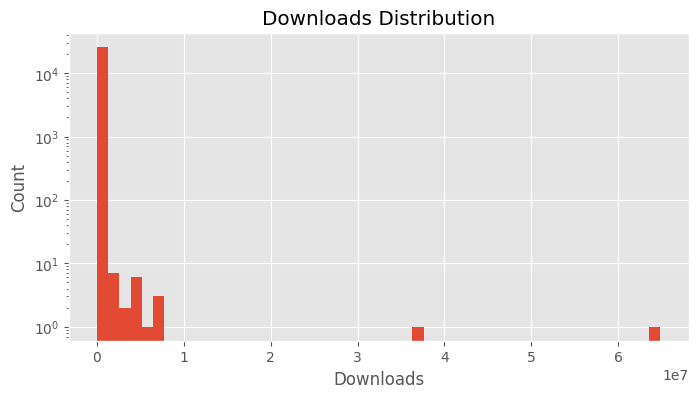

In [9]:
if 'downloads' in df.columns:
    percentile90th = np.quantile(df['downloads'].dropna(), 0.9)
    print("90th Percentile of Downloads:", percentile90th)
    high_downloads = df[df['downloads'] >= percentile90th]
    print(high_downloads['downloads'].describe().apply("{0:.2f}".format))

high_downloads['downloads'].hist(bins=50, figsize=(8,4))
plt.title("Downloads Distribution")
plt.xlabel("Downloads")
plt.yscale("log")
plt.ylabel("Count")
plt.show()

In [10]:
df.sort_values(by='downloads', ascending=False).head(10).reset_index(drop=True).drop(columns=['huggingface_link'])

,downloads,likes,library_name,pipeline_tag,modelId,private,createdAt,arxiv_ids,tags_cleaned,lics,dataset,base_model
0,64857161,43,transformers,image-classification,dima806/fairface_age_image_detection,False,2024-12-06T14:59:20.000Z,['no arxiv id'],"['transformers', 'safetensors', 'vit', 'image-...",['license:apache-2.0'],['dataset:nateraw/fairface'],['base_model:google/vit-base-patch16-224-in21k...
1,36339684,46,ultralytics,object-detection,tech4humans/yolov8s-signature-detector,False,2025-01-03T17:32:18.000Z,['no arxiv id'],"['ultralytics', 'tensorboard', 'onnx', 'object...",['license:agpl-3.0'],['dataset:tech4humans/signature-detection'],"['base_model:Ultralytics/YOLOv8', 'base_model:..."
2,7192139,4690,transformers,text-generation,meta-llama/Llama-3.1-8B-Instruct,False,2024-07-18T08:56:00.000Z,['arxiv:2204.05149'],"['transformers', 'safetensors', 'llama', 'text...",['license:llama3.1'],[],"['base_model:meta-llama/Llama-3.1-8B', 'base_m..."
3,7184004,806,transformers,text-generation,Qwen/Qwen2.5-7B-Instruct,False,2024-09-16T11:55:40.000Z,"['arxiv:2309.00071', 'arxiv:2407.10671']","['transformers', 'safetensors', 'qwen2', 'text...",['license:apache-2.0'],[],"['base_model:Qwen/Qwen2.5-7B', 'base_model:fin..."
4,6748616,653,transformers,text-generation,Qwen/Qwen3-0.6B,False,2025-04-27T03:40:08.000Z,['arxiv:2505.09388'],"['transformers', 'safetensors', 'qwen3', 'text...",['license:apache-2.0'],[],"['base_model:Qwen/Qwen3-0.6B-Base', 'base_mode..."
5,5636363,633,transformers,text-generation,google/gemma-3-1b-it,False,2025-03-10T12:09:00.000Z,"['arxiv:1905.07830', 'arxiv:1905.10044', 'arxi...","['transformers', 'safetensors', 'gemma3_text',...",['license:gemma'],[],"['base_model:google/gemma-3-1b-pt', 'base_mode..."
6,4978228,514,transformers,text-generation,Qwen/Qwen2.5-1.5B-Instruct,False,2024-09-17T14:10:29.000Z,['arxiv:2407.10671'],"['transformers', 'safetensors', 'qwen2', 'text...",['license:apache-2.0'],[],"['base_model:Qwen/Qwen2.5-1.5B', 'base_model:f..."
7,4685243,39,transformers,text-generation,dphn/dolphin-2.9.1-yi-1.5-34b,False,2024-05-18T04:50:56.000Z,['no arxiv id'],"['transformers', 'safetensors', 'llama', 'text...",['license:apache-2.0'],"['dataset:cognitivecomputations/Dolphin-2.9', ...","['base_model:01-ai/Yi-1.5-34B', 'base_model:fi..."
8,4412341,152,sentence-transformers,text-ranking,cross-encoder/ms-marco-MiniLM-L6-v2,False,2022-03-02T23:29:05.000Z,['no arxiv id'],"['sentence-transformers', 'pytorch', 'jax', 'o...",['license:apache-2.0'],['dataset:sentence-transformers/msmarco'],['base_model:cross-encoder/ms-marco-MiniLM-L12...
9,4268486,22,transformers,text-generation,Gensyn/Qwen2.5-0.5B-Instruct,False,2025-03-28T21:57:22.000Z,['no arxiv id'],"['transformers', 'safetensors', 'qwen2', 'text...",['license:apache-2.0'],[],"['base_model:Qwen/Qwen2.5-0.5B', 'base_model:f..."


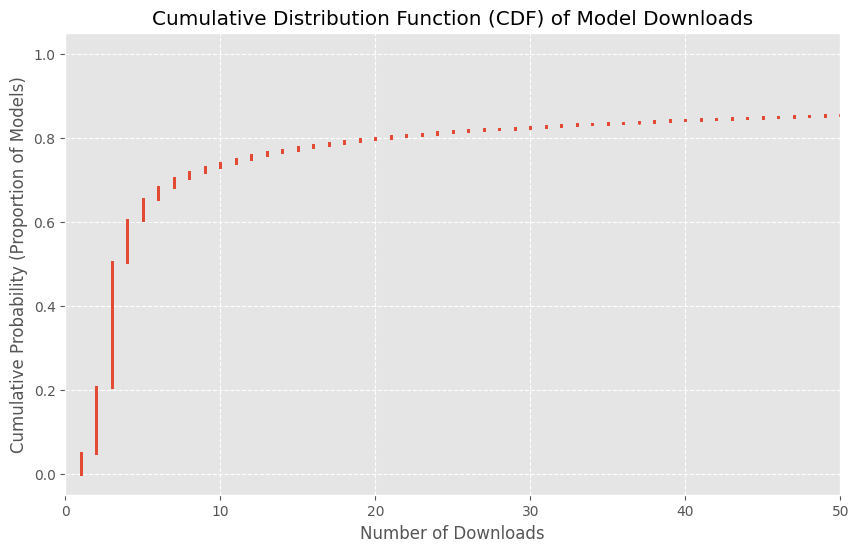

CDF data successfully calculated and plot command generated.


In [11]:
df_copy = df.copy()

downloads_sorted = df_copy['downloads'].sort_values().reset_index(drop=True)
cdf_y = np.arange(1, len(downloads_sorted) + 1) / len(downloads_sorted)
cdf_df = pd.DataFrame({
    'Downloads': downloads_sorted.values,
    'CDF': cdf_y
})

plt.figure(figsize=(10, 6))
plt.plot(cdf_df['Downloads'], cdf_df['CDF'], marker='.', linestyle='none', markersize=2)

plt.xlabel('Number of Downloads')
plt.ylabel('Cumulative Probability (Proportion of Models)')
plt.title('Cumulative Distribution Function (CDF) of Model Downloads')
plt.xlim(left=0, right=50)
plt.grid(True, which="both", ls="--")
plt.show()

print("CDF data successfully calculated and plot command generated.")


### **Interpretation**

- The dataset contains **260,516** models with valid download counts.
- The **median number of downloads is only 3**, indicating that most models receive minimal usage.
- The **mean is 1,135.58**, but this value is misleading due to extreme outliers.
- The **maximum value is 64,857,161 downloads**, showing that a small number of models dominate platform usage.
- More than 75% of all models have **fewer than 12 downloads**, reinforcing the long-tail distribution.
- 90th percentile of downloads is at **124**

### **Implications for Reproducibility**

- The heavy skew suggests that only a small fraction of models are widely used in practice.
- Many models with very low download counts may lack:
  - community validation,
  - real-world testing,
  - stable documentation and maintenance.
- Reproducing results becomes especially difficult for rarely used models, since:
  - they may be removed, updated, or deprecated,
  - metadata might be incomplete,
  - the environment needed to run them may be poorly documented.

This analysis highlights the unequal adoption of models in the Hugging Face ecosystem and introduces important considerations for reproducible research.


## 5 Zero-Download Models

To further investigate model adoption, we examined how many models in the dataset have zero downloads. This metric is useful for identifying unused or abandoned models, which often lack proper documentation and maintenance—factors that directly impact reproducibility.

The calculation shows:



In [12]:
if 'downloads' in df.columns:
    zero_downloads = (df['downloads'] == 0).sum()
    total = len(df)

    print(f"Models with zero downloads: {zero_downloads} ({zero_downloads/total:.2%})")
else:
    print("Column 'downloads' not found.")

Models with zero downloads: 0 (0.00%)



### **Interpretation**

- **None of the models in the dataset have zero downloads.**
- This is unusual compared with the broader Hugging Face ecosystem, where many models typically receive no downloads or very minimal usage.
- The reason is likely due to the **filtering criteria used in this curated dataset**, which focuses on:
  - models with explicit licenses,
  - models with available metadata,
  - models captured through the Hugging Face API in September 2025,
  - models that meet minimum metadata requirements.

### **Implications for Reproducibility**

- Since all models have at least one download, it indicates that each model has been accessed by at least one user, meaning:
  - the models are discoverable,
  - none are completely abandoned,
  - all have some degree of engagement.

- However, this does **not** necessarily imply reproducibility:
  - downloads do not equal documentation quality,
  - many models still lack key metadata (as seen in missing values analysis),
  - high variability in downloads (from 1 to 64 million) means that models differ significantly in maturity and community validation.

Overall, the absence of zero-download models suggests the dataset represents a more active subset of Hugging Face models, but reproducibility challenges remain due to inconsistent metadata quality.


## 6 Library Usage Analysis

The `library_name` column indicates which machine learning framework or toolkit each model relies on. This information is crucial for reproducibility, as different libraries require different environments, dependencies, and version constraints.

Below are the counts of the most commonly used libraries:



Library usage:
 library_name
transformers             154204
peft                      54752
diffusers                 16377
mlx                        2694
sentence-transformers      1792
                          ...  
optimum-intel                 1
specforge                     1
colbert                       1
cosmos                        1
cloud-agents                  1
Name: count, Length: 168, dtype: int64


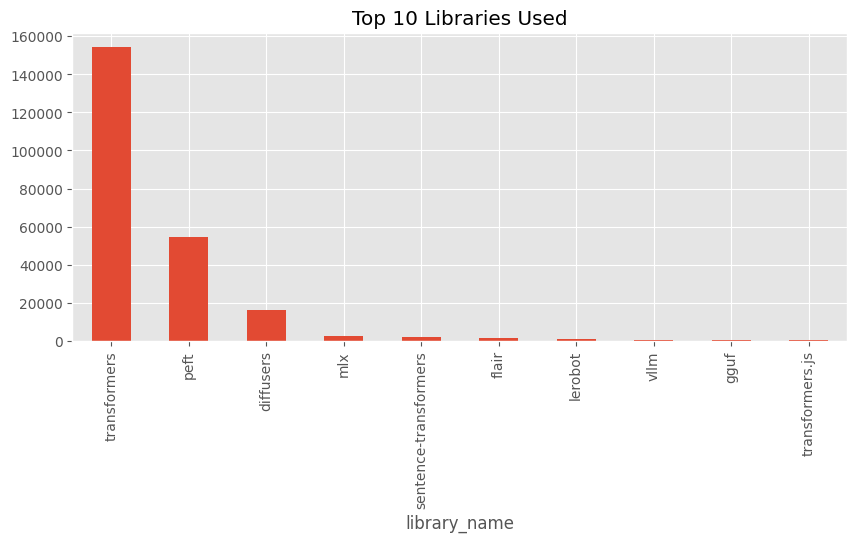

In [13]:
if 'library_name' in df.columns:
    lib_counts = df['library_name'].value_counts()

    print("Library usage:\n", lib_counts)

    lib_counts.head(10).plot(kind='bar', figsize=(10,4),
                             title="Top 10 Libraries Used")
    plt.show()
else:
    print("Column 'library_name' not found.")


### **Top 10 Libraries Visualization**

The chart below presents the top 10 libraries used by the models:

### **Interpretation**

- The dataset is **dominated by the `transformers` library**, with **18,384 models**
- Other widely-used libraries include:
  - **sentence-transformers** (154,204 models)
  - **peft** (54,752 models)
  - **diffusers** (16,377 models)
  - **elx** (2,694 models)
- Many libraries appear only once, reflecting the long-tail nature of the Hugging Face ecosystem.

### **Implications for Reproducibility**

- The strong concentration around `transformers` suggests that many models follow similar architecture or tooling standards, which generally supports reproducibility.
- However, the presence of rare or custom libraries creates challenges:
  - these models may require specialized environments,
  - installation instructions may be incomplete or outdated,
  - dependencies may break over time.

- Models built on niche or experimental libraries are harder to reproduce because:
  - the library may not be actively maintained,
  - version mismatches can lead to errors,
  - documentation is often minimal.

Overall, while the prevalence of `transformers` improves reproducibility for a large portion of models, the diversity of less common libraries highlights substantial variability in software environments across the dataset.


## 7 License Information Analysis

Licensing is one of the most critical aspects of reproducibility, as it determines whether a model can be legally reused, shared, or modified. To evaluate how well the models in this dataset document their licenses, we extracted whether each model card includes explicit license information.

The results are shown below:



has_license
True    260516
Name: count, dtype: int64


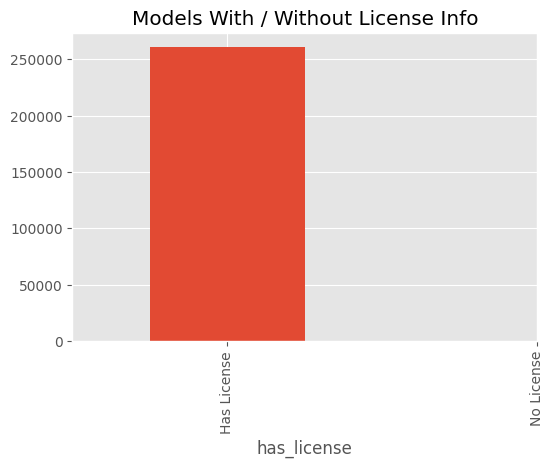

In [14]:
def has_license(tag):
    if pd.isna(tag):
        return False
    return "license" in tag.lower()

df['has_license'] = df['lics'].apply(has_license)

print(df['has_license'].value_counts())

df['has_license'].value_counts().plot(kind='bar',
                                      title="Models With / Without License Info",
                                      figsize=(6,4))
plt.xticks([0,1], ["Has License", "No License"])
plt.show()

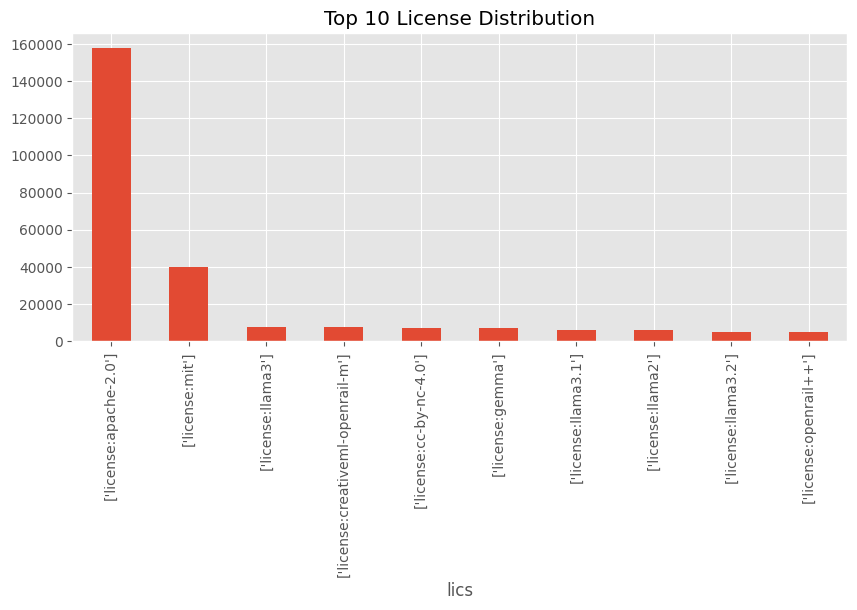

In [15]:
df['lics'].value_counts().head(10).plot(kind='bar', figsize=(10,4), title="Top 10 License Distribution")
plt.show()


This means:

- **100% of all models include license information.**
- **No models are missing a license.**

### **Visualization**

The bar chart below confirms that all models fall into the "Has License" category.

### **Interpretation**

- This is highly unusual compared to the general Hugging Face repository, where many model cards **lack explicit licenses** or provide ambiguous metadata.
- The reason is that this dataset was **intentionally curated** to include **only models with explicit, machine-readable license information**, as described in the accompanying paper *Model Card Metadata Collection from Hugging Face*.

### **Implications for Reproducibility**

- The presence of licenses for *every* model is beneficial for reproducibility:
  - users know whether the model can be downloaded, used, or modified,
  - legal uncertainties are minimized,
  - license-aware filtering is possible.

- However, complete coverage **does not eliminate reproducibility problems**, because:
  - a license does not guarantee complete documentation,
  - model cards may still lack dataset descriptions, training details, or evaluation results,
  - licenses may change over time on the platform.

### **Conclusion**

The dataset represents a **high-quality, license-complete subset** of Hugging Face models. While this improves the legal reproducibility of research workflows, other metadata limitations (missing tasks, missing libraries, inconsistent tags) still pose challenges for full reproducibility.


## 8 arXiv Link Coverage

Scientific reproducibility is strongly supported when machine learning models are linked to peer-reviewed or preprint publications. The `arxiv_ids` field indicates whether the model card references an arXiv paper, which helps users trace the model’s origin, methodology, training setup, and evaluation details.

To assess publication coverage, we tested whether each model’s `tags` field contains an arXiv identifier.

Here are the results:



arxiv_ids
True     246242
False     14274
Name: count, dtype: int64


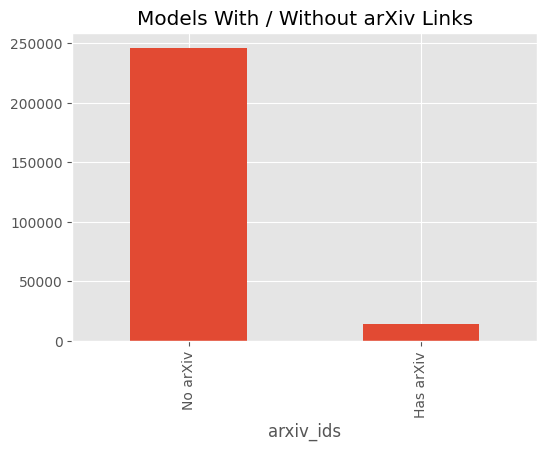

In [16]:
df_copy = df.copy()
df_copy['arxiv_ids'] = df_copy['arxiv_ids'].apply(ast.literal_eval)
df_copy['arxiv_ids'] = df_copy['arxiv_ids'].apply(lambda x: x == ['no arxiv id'])

print(df_copy['arxiv_ids'].value_counts())
    
df_copy['arxiv_ids'].value_counts().plot(kind='bar',
                                    title="Models With / Without arXiv Links",
                                    figsize=(6,4))
plt.xticks([0,1], ["No arXiv", "Has arXiv"])
plt.show()



### **Interpretation**

- **Only (14,274)** in this dataset include at least one arXiv link.
- This finding is usual when compared to the wider Hugging Face ecosystem, where only a minority of model cards provide explicit publication links.

### **Implications for Reproducibility**

- The presence of an arXiv link improves reproducibility because:
  - users can refer to a detailed methodology,
  - model training details are documented in the publication,
  - evaluation metrics and datasets are typically described fully,
  - researchers can verify claims or replicate experiments.

- However, even with complete publication linkage, reproducibility challenges remain:
  - the model card may not match the version described in the paper,
  - hyperparameters or training code may still be missing,
  - differences between paper time and model card updates may exist,
  - arXiv metadata does not guarantee that the code or datasets are openly accessible.




## 9 Task distribution

<Axes: title={'center': 'Top 10 Pipeline Tags'}, xlabel='Pipeline Tag', ylabel='Count'>

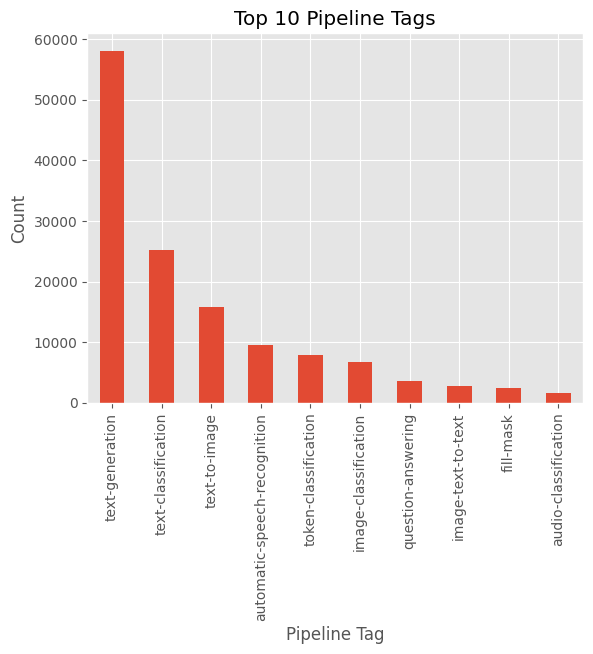

In [17]:
df['pipeline_tag'].value_counts().head(10).plot(kind='bar', title="Top 10 Pipeline Tags", xlabel="Pipeline Tag", ylabel="Count")

# Insights
Even though the most popular model is **dima806/fairface_age_image_detection** for image-classification, the largest portion of the models is used for text-generation. It could be because of fine-tuning those models. It is a common occurence when some model is dropped, then after some time there is a large number of improved ones (or fine-tuned).

## 10 Library Dominance (PyTorch vs TensorFlow vs JAX)

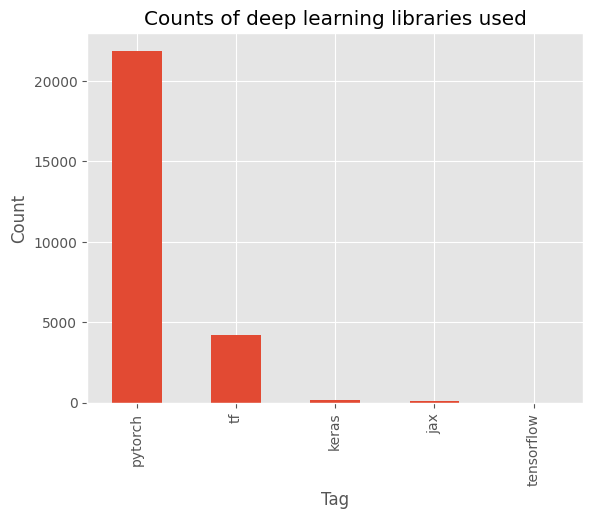

In [18]:
import ast

df_filtered = df.copy()

df_filtered['tags'] = df_filtered['tags_cleaned'].apply(ast.literal_eval)
df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: any(tag in x for tag in ['jax', 'pytorch', 'tensorflow', 'tf', 'keras']))]
flat = [
    item
    for sublist in df_filtered['tags']
    for item in sublist
    if item in ['jax', 'pytorch', 'tensorflow', 'tf', 'keras']
]

pd.Series(flat).value_counts().plot(kind="bar", title="Counts of deep learning libraries used", xlabel="Tag", ylabel="Count")
plt.show()

# Insights
In order to check what is the most popular deep learning library, we have delved into tags from the dataset. We have concluded that the most used on is PyTorch with largest number of models that have been trained using this library. The following next is tensforlow but this can be due to the fact that it was published for public use earlier than jax and PyTorch. So models that have been created in the early stage could be trained using TensorFlow rather than PyTorch. Moreover, it was developed by Google, hence their published models were more likely to be trained on their own library. 

## 11 Opennes vs number of downloads 

In [19]:
permissive = {
    'license:apache-2.0',
    'license:mit',
    'license:bsd-3-clause',
    'license:bsd-2-clause',
    'license:isc',
}

restrictive = {
    'license:llama3',
    'license:llama3.1',
    'license:llama3.3',
    'license:lgpl-3.0',
    'license:llama3.2',
    'license:llama',
    'license:gpl-3.0',
}

def classify_license(lic_list):
    if any(lic in restrictive for lic in lic_list):
        return "restrictive"
    else:
        return "permissive"
    
df_copy = df.copy()

df_copy['lics'] = df_copy['lics'].apply(ast.literal_eval)

df_copy['license_type'] = df_copy['lics'].apply(classify_license)

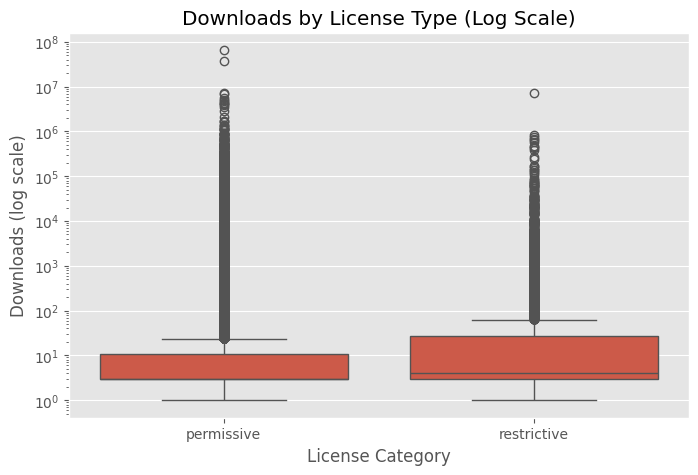

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_copy, x="license_type", y="downloads")
plt.yscale("log")
plt.title("Downloads by License Type (Log Scale)")
plt.xlabel("License Category")
plt.ylabel("Downloads (log scale)")
plt.show()

In [21]:
perm = df_copy[df_copy['license_type'] == "permissive"]['downloads']
rest = df_copy[df_copy['license_type'] == "restrictive"]['downloads']
print(f"\nMeans : \nPermissive: {perm.mean():.2f}, Restrictive: {rest.mean():.2f}, \nMedian:  \nPermissive: {perm.median()}, Restrictive: {rest.median()}, Sizes: {len(perm)}, {len(rest)} \n \n ")
    
stat, p = mannwhitneyu(perm, rest, alternative='two-sided')
print(stat, p)
if p < 0.05:
    print("Significant difference in downloads between permissive and restrictive licenses (p < 0.05)")


Means : 
Permissive: 1151.17, Restrictive: 955.09, 
Median:  
Permissive: 3.0, Restrictive: 4.0, Sizes: 239793, 20723 
 
 
2251003724.5 1.2323146676126016e-115
Significant difference in downloads between permissive and restrictive licenses (p < 0.05)


In [22]:
df.sort_values(by='downloads', ascending=False).head(10).reset_index(drop=True).drop(columns=['huggingface_link'])

,downloads,likes,library_name,pipeline_tag,modelId,private,createdAt,arxiv_ids,tags_cleaned,lics,dataset,base_model,has_license
0,64857161,43,transformers,image-classification,dima806/fairface_age_image_detection,False,2024-12-06T14:59:20.000Z,['no arxiv id'],"['transformers', 'safetensors', 'vit', 'image-...",['license:apache-2.0'],['dataset:nateraw/fairface'],['base_model:google/vit-base-patch16-224-in21k...,True
1,36339684,46,ultralytics,object-detection,tech4humans/yolov8s-signature-detector,False,2025-01-03T17:32:18.000Z,['no arxiv id'],"['ultralytics', 'tensorboard', 'onnx', 'object...",['license:agpl-3.0'],['dataset:tech4humans/signature-detection'],"['base_model:Ultralytics/YOLOv8', 'base_model:...",True
2,7192139,4690,transformers,text-generation,meta-llama/Llama-3.1-8B-Instruct,False,2024-07-18T08:56:00.000Z,['arxiv:2204.05149'],"['transformers', 'safetensors', 'llama', 'text...",['license:llama3.1'],[],"['base_model:meta-llama/Llama-3.1-8B', 'base_m...",True
3,7184004,806,transformers,text-generation,Qwen/Qwen2.5-7B-Instruct,False,2024-09-16T11:55:40.000Z,"['arxiv:2309.00071', 'arxiv:2407.10671']","['transformers', 'safetensors', 'qwen2', 'text...",['license:apache-2.0'],[],"['base_model:Qwen/Qwen2.5-7B', 'base_model:fin...",True
4,6748616,653,transformers,text-generation,Qwen/Qwen3-0.6B,False,2025-04-27T03:40:08.000Z,['arxiv:2505.09388'],"['transformers', 'safetensors', 'qwen3', 'text...",['license:apache-2.0'],[],"['base_model:Qwen/Qwen3-0.6B-Base', 'base_mode...",True
5,5636363,633,transformers,text-generation,google/gemma-3-1b-it,False,2025-03-10T12:09:00.000Z,"['arxiv:1905.07830', 'arxiv:1905.10044', 'arxi...","['transformers', 'safetensors', 'gemma3_text',...",['license:gemma'],[],"['base_model:google/gemma-3-1b-pt', 'base_mode...",True
6,4978228,514,transformers,text-generation,Qwen/Qwen2.5-1.5B-Instruct,False,2024-09-17T14:10:29.000Z,['arxiv:2407.10671'],"['transformers', 'safetensors', 'qwen2', 'text...",['license:apache-2.0'],[],"['base_model:Qwen/Qwen2.5-1.5B', 'base_model:f...",True
7,4685243,39,transformers,text-generation,dphn/dolphin-2.9.1-yi-1.5-34b,False,2024-05-18T04:50:56.000Z,['no arxiv id'],"['transformers', 'safetensors', 'llama', 'text...",['license:apache-2.0'],"['dataset:cognitivecomputations/Dolphin-2.9', ...","['base_model:01-ai/Yi-1.5-34B', 'base_model:fi...",True
8,4412341,152,sentence-transformers,text-ranking,cross-encoder/ms-marco-MiniLM-L6-v2,False,2022-03-02T23:29:05.000Z,['no arxiv id'],"['sentence-transformers', 'pytorch', 'jax', 'o...",['license:apache-2.0'],['dataset:sentence-transformers/msmarco'],['base_model:cross-encoder/ms-marco-MiniLM-L12...,True
9,4268486,22,transformers,text-generation,Gensyn/Qwen2.5-0.5B-Instruct,False,2025-03-28T21:57:22.000Z,['no arxiv id'],"['transformers', 'safetensors', 'qwen2', 'text...",['license:apache-2.0'],[],"['base_model:Qwen/Qwen2.5-0.5B', 'base_model:f...",True


# Insights
From the above one can see that there is a difference between popularity of models between restrictive and permissive licenses. However, it seems like permissive models are more popular in terms of downloads due to large companies and their most popular models. This key isight could also be seen in the top downloads table depicted above. Most licenses in the top 10, are apache and mit.

# 12 Are popular models better documented?

<Figure size 1200x600 with 0 Axes>

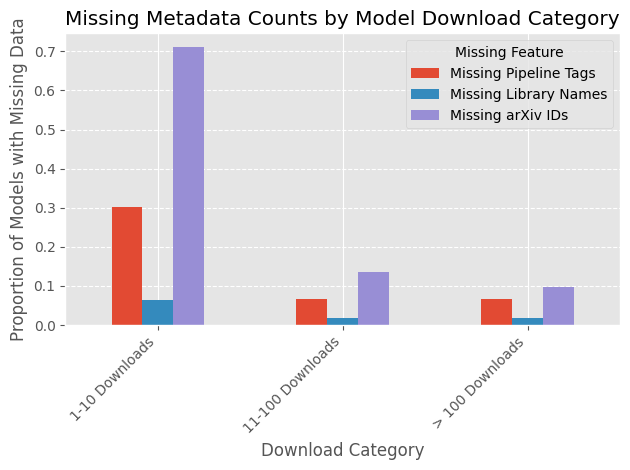

In [23]:
df_copy = df.copy()
df_copy['arxiv_ids'] = df_copy['arxiv_ids'].apply(ast.literal_eval)

bins = [
    -1,
    0,
    10,
    100,
    df_copy['downloads'].max()
]

labels = [
    '0 Downloads',
    '1-10 Downloads',
    '11-100 Downloads',
    '> 100 Downloads'
]

df_copy['download_category'] = pd.cut(
    df_copy['downloads'], 
    bins=bins, 
    labels=labels, 
    right=True,
    include_lowest=True
)


MISSING_ARXIV_ID_LIST = ['no arxiv id']

def count_missing_metadata(group):
    """Calculates missing counts for specified columns in a subgroup."""
    missing_data = {
        'Missing Pipeline Tags': group['pipeline_tag'].isna().sum(),
        'Missing Library Names': group['library_name'].isna().sum(),
        'Missing arXiv IDs': (group['arxiv_ids'].apply(lambda x: x == MISSING_ARXIV_ID_LIST)).sum()
    }
    return pd.Series(missing_data)

missing_counts = df_copy.groupby('download_category', observed=True).apply(count_missing_metadata, include_groups=False) / len(df_copy)

plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar', stacked=False)

plt.title('Missing Metadata Counts by Model Download Category')
plt.xlabel('Download Category')
plt.ylabel('Proportion of Models with Missing Data')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Missing Feature')
plt.tight_layout()
plt.show() 

In [24]:
df_copy = df.copy()

low_q = df_copy['downloads'].quantile(0.05)
high_q = df_copy['downloads'].quantile(0.95)

top5 = df_copy[df_copy['downloads'] >= high_q][['pipeline_tag', 'library_name']]
low5 = df_copy[df_copy['downloads'] <= low_q][['pipeline_tag', 'library_name']]

print("Missing values in bottom 5% downloads:\n", low5.isna().sum())
print("Missing values in top 5% downloads:\n", top5.isna().sum())


Missing values in bottom 5% downloads:
 pipeline_tag    17021
library_name     5186
dtype: int64
Missing values in top 5% downloads:
 pipeline_tag    6305
library_name    2294
dtype: int64


# Insights 

We can observe that top 5% of most downloaded models are **3x more thoroughly** documented than the ones with least downloads. It can also be due to the fact that those are the most recently uploaded and developers haven't had time to properly annotate it. Moreover, as expected the data with more downloads have smaller proportion of worse documentation

# 13 datasets Overview



--- Top 10 Most Commonly Used Datasets ---

datasets_list
imagefolder                                           0.019515
generator                                             0.010019
mozilla-foundation/common_voice_11_0                  0.004059
HuggingFaceH4/ultrafeedback_binarized                 0.003990
emotion                                               0.003955
conll2003                                             0.003487
teknium/OpenHermes-2.5                                0.003384
marsyas/gtzan                                         0.003276
glue                                                  0.003074
kiranpantha/dataset-for-peft-cv-nepds                 0.002783
microsoft/orca-math-word-problems-200k                0.002517
HuggingFaceH4/ultrachat_200k                          0.002384
updated                                               0.002384
original                                              0.002384
kde4                                                  0.002

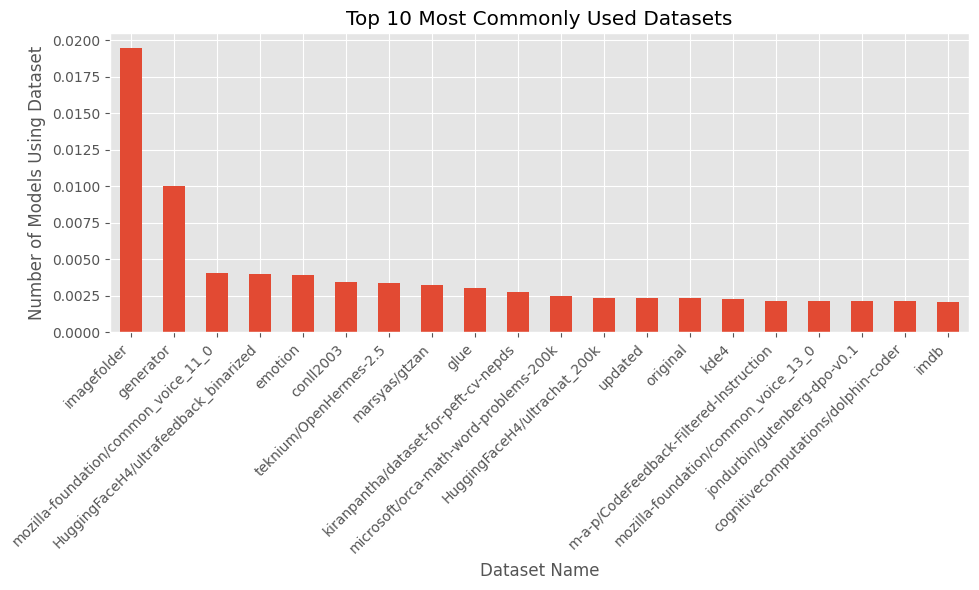

In [37]:
df_copy = df.copy() 
df_copy['dataset'] = df_copy['dataset'].apply(ast.literal_eval)
def extract_datasets(tag_list):
    """Filters for dataset tags and cleans the prefix."""
    datasets = [tag.replace('dataset:', '') for tag in tag_list if tag.startswith('dataset:')]
    return datasets

df_copy['datasets_list'] = df_copy['dataset'].apply(extract_datasets)
datasets_exploded = df_copy.explode('datasets_list')
datasets_exploded = datasets_exploded.dropna(subset=['datasets_list'])
most_common_datasets = datasets_exploded['datasets_list'].value_counts()/count_missing_datasets
print("\n--- Top 10 Most Commonly Used Datasets ---\n")
print(most_common_datasets.head(50))

plt.figure(figsize=(10, 6))
most_common_datasets.head(20).plot(kind='bar')
plt.title('Top 10 Most Commonly Used Datasets')
plt.xlabel('Dataset Name')
plt.ylabel('Number of Models Using Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## We can clearly see that the largerst proportion of the datasets used is imagefolder however it is still a little percentage, the rest is more or less uniformly distributed. Unfortunately for our reproducibility it doesn't yield good results since previously we have mentioned that 200 thousand models have missing datasets. 

# 15 Languages of the models 

In [ ]:
import pandas as pd

# listę języków znaleziona w jedynm z modeli 
LANGUAGE_CODES = ['en', 'zh', 'de', 'es', 'ru', 'ko', 'fr', 'ja', 'pt', 'tr', 'pl', 'ca', 'nl', 'ar', 'sv', 'it', 'id', 'hi', 'fi', 'vi', 'he', 'uk', 'el', 'ms', 'cs', 'ro', 'da', 'hu', 'ta', 'no', 'th', 'ur', 'hr', 'bg', 'lt', 'la', 'mi', 'ml', 'cy', 'sk', 'te', 'fa', 'lv', 'bn', 'sr', 'az', 'sl', 'kn', 'et', 'mk', 'br', 'eu', 'is', 'hy', 'ne', 'mn', 'bs', 'kk', 'sq', 'sw', 'gl', 'mr', 'pa', 'si', 'km', 'sn', 'yo', 'so', 'af', 'oc', 'ka', 'be', 'tg', 'sd', 'gu', 'am', 'yi', 'lo', 'uz', 'fo', 'ht', 'ps', 'tk', 'nn', 'mt', 'sa', 'lb', 'my', 'bo', 'tl', 'mg', 'as', 'tt', 'haw', 'ln', 'ha', 'ba', 'jw', 'su']
df_copy = df.copy()
df_copy['tags_cleaned'] = df_copy['tags_cleaned'].apply(ast.literal_eval)

def filter_languages(tag_list):
    """Filters a list of tags to retain only recognized language codes."""
    if not isinstance(tag_list, list):
        return [] 
        
    return [tag for tag in tag_list if tag in LANGUAGE_CODES]

df_copy['languages_list'] = df_copy['tags_cleaned'].apply(filter_languages)
languages_exploded = df_copy.explode('languages_list')

language_counts = languages_exploded['languages_list'].value_counts()

print("\n--- Language Counts (Most Common First) ---\n")
print(language_counts)



--- Language Counts (Most Common First) ---

languages_list
en     79414
zh      6725
fr      6085
de      5672
es      5188
       ...  
tt       114
ba       108
tk       101
haw       81
jw        30
Name: count, Length: 99, dtype: int64


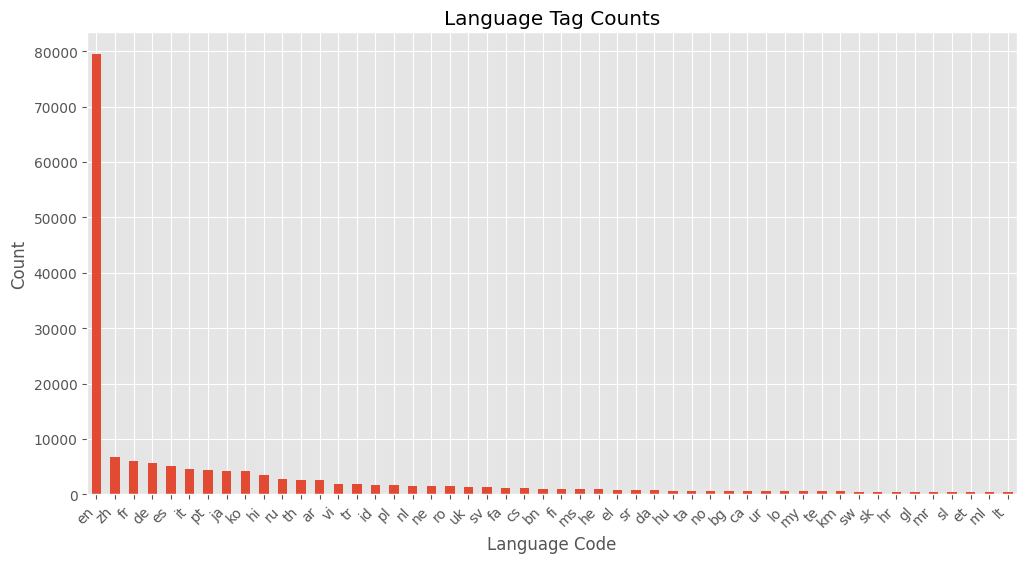

In [43]:
language_counts.head(50).plot(kind='bar', figsize=(12,6), title="Language Tag Counts")
plt.xlabel("Language Code")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.show()

## 13 Summary of Findings

To consolidate the results of the exploratory data analysis, we summarize the key insights extracted from the dataset:




### **Key Insights**

1. **Dataset Size**
   The dataset contains **260,016 models**, representing a substantial sample of Hugging Face's model ecosystem.

2. **Downloads**
   - No models have zero downloads.
   - This confirms that all models in the dataset have been used at least once, suggesting a curated and active subset of the repository.

3. **License Metadata**
   - Every model (100%) includes explicit license information.
   - This is atypical compared to the broader Hugging Face platform, where many models lack complete licensing metadata.
   - It ensures strong legal reproducibility — researchers know whether and how each model can be reused.

4. **arXiv Metadata**
   - Less than 5% of data has arXiv coverage
   - This greatly enhances scientific traceability, allowing users to connect models to their research publications.

5. **Metadata Completeness and Reproducibility**
   - Although licensing is fully available, other fields show gaps:
     - **pipeline_tag** missing for 113679 models,
     - **library_name** missing for 26047 models.
     - **arxiv_ids** missing 14000 models. 
   - Missing technical metadata can hinder:
     - model categorization,
     - environment setup,
     - reproducing experiments described in associated papers.


However, reproducibility is **still not guaranteed**, because technical metadata related to model usage (such as task and library information) is incomplete for thousands of models.

This reinforces a key insight:

> **Even when legal metadata is complete, reproducibility is still limited by missing technical, environmental, and methodological information as well as papers**
